In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [44]:
df = pd.read_csv('/content/wine_data.csv', header=None, usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']

<h1>Analysis</h1>

In [45]:
df.head(), df.shape

(   Class label  Alcohol  Malic acid
 0            1    14.23        1.71
 1            1    13.20        1.78
 2            1    13.16        2.36
 3            1    14.37        1.95
 4            1    13.24        2.59,
 (178, 3))

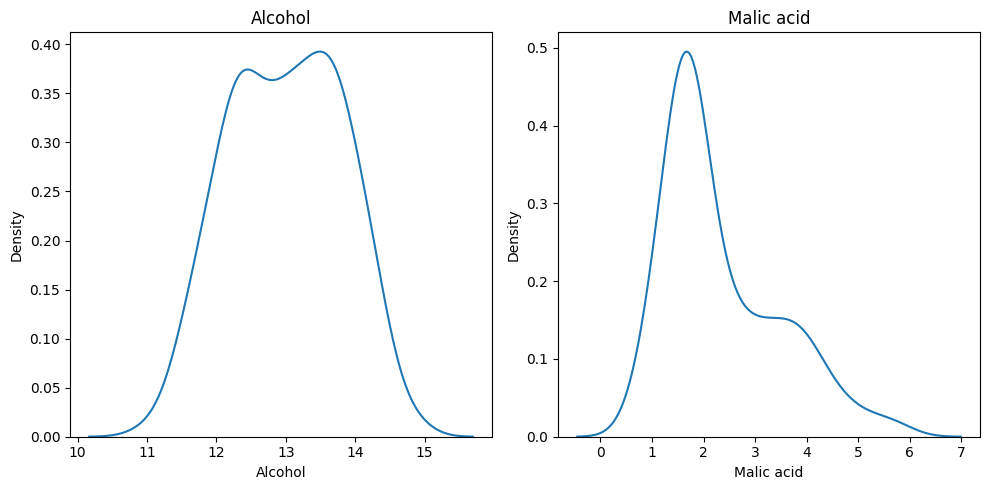

In [46]:
_, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.kdeplot(df['Alcohol'], ax=axs[0])
axs[0].set_title('Alcohol')

sns.kdeplot(df['Malic acid'], ax=axs[1])
axs[1].set_title('Malic acid')

plt.tight_layout()
plt.show()

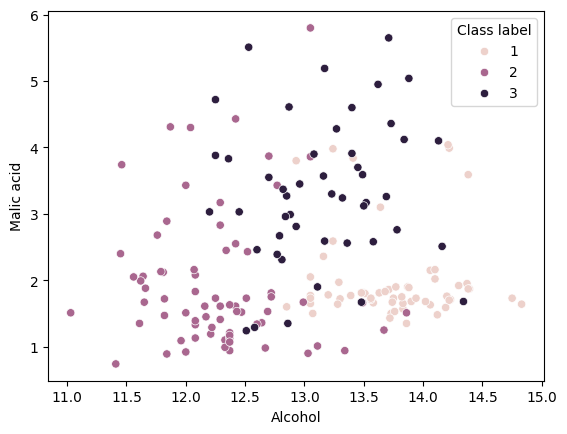

In [47]:
sns.scatterplot(data=df, x='Alcohol', y='Malic acid', hue='Class label')
plt.show()

<h1>Train Test Split</h1>

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1), df['Class label'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 2), (54, 2), (124,), (54,))

<h1>Min Max Scaling</h1>

In [49]:
scaler = MinMaxScaler()

# To learn parameters from X_train
scaler.fit(X_train)

# Apply on both
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1>Converting to DataFrame for Analyzation</h2>

In [50]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [51]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


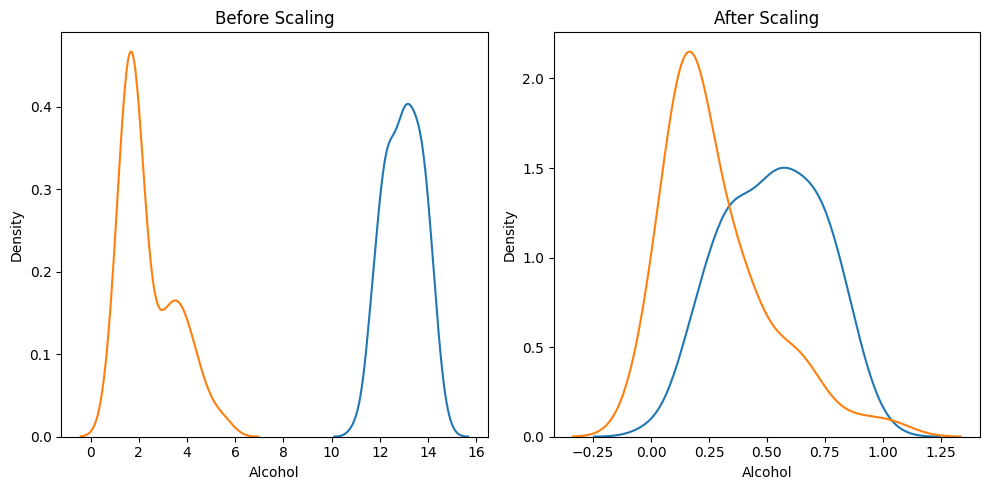

In [52]:
_, (axs1,axs2) = plt.subplots(1, 2, figsize=(10, 5))

sns.kdeplot(X_train['Alcohol'], ax=axs1)
sns.kdeplot(X_train['Malic acid'], ax=axs1)
axs1.set_title('Before Scaling')

sns.kdeplot(X_train_scaled['Alcohol'], ax=axs2)
sns.kdeplot(X_test_scaled['Malic acid'], ax=axs2)
axs2.set_title('After Scaling')

plt.tight_layout()
plt.show()

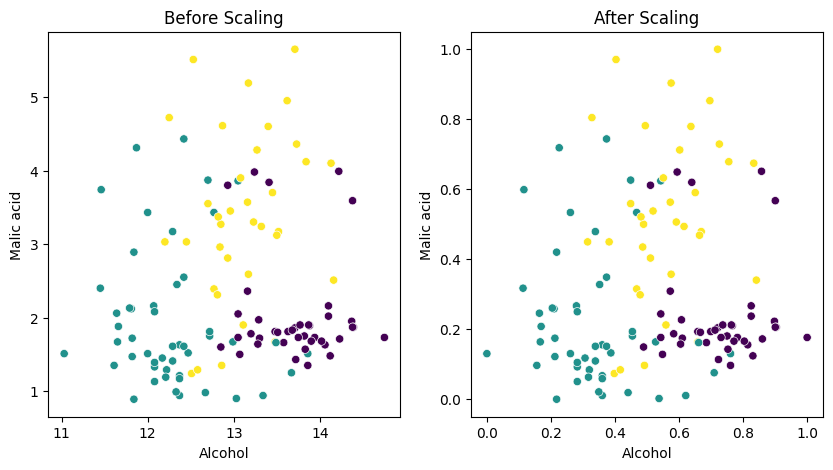

In [70]:
_, (axs1,axs2) = plt.subplots(ncols=2, figsize=(10, 5))
sns.scatterplot(x=X_train['Alcohol'], y=X_train['Malic acid'], c=y_train, ax=axs1)
axs1.set_title('Before Scaling')


sns.scatterplot(x=X_train_scaled['Alcohol'], y=X_train_scaled['Malic acid'], c=y_train, ax=axs2)
axs2.set_title('After Scaling')

plt.show()